In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
path = '/Users/davidmiles-skov/Desktop/Academics/Projects/market-clearing-price/data/test2.csv'
df = pd.read_csv(path)
# renaming columns for easier access
mapper={'Quantity (MWh)':'Quantity',  'Price (€/MWh)':'Price'}
df=df.rename(columns=mapper)
df_supply = df[df['Supply/Demand']=='Supply'].sort_values(by=['Price']).sort_values(by=['Price'])
df_demand = df[df['Supply/Demand']=='Demand'].sort_values(by=['Price']).sort_values(by=['Price'], ascending=False)
df

,Company,Supply/Demand,ID,Quantity,Price
0,ShinyPower,Supply,G3,32,0
1,RoskildeCHP,Supply,G4,25,42
2,FlexiGas,Supply,G1,15,75
3,CleanCharge,Demand,D2,23,78
4,WeLovePower,Demand,D1,35,65
5,ElRetail,Demand,D4,38,46
6,IntelliWat,Demand,D6,16,32
7,JyskeEl,Demand,D3,312,10


In [5]:
print('----- Supply -----')
print(df_supply.head())
print('----- Demand -----')
print(df_demand.head())

----- Supply -----
       Company Supply/Demand  ID  Quantity  Price
0   ShinyPower        Supply  G3        32      0
1  RoskildeCHP        Supply  G4        25     42
2     FlexiGas        Supply  G1        15     75
----- Demand -----
       Company Supply/Demand  ID  Quantity  Price
3  CleanCharge        Demand  D2        23     78
4  WeLovePower        Demand  D1        35     65
5     ElRetail        Demand  D4        38     46
6   IntelliWat        Demand  D6        16     32
7      JyskeEl        Demand  D3       312     10


In [6]:
quantity_supply, quantity_demand = df_supply['Quantity'].to_numpy(), df_demand['Quantity'].to_numpy()
price_supply, price_demand = df_supply['Price'].to_numpy(), df_demand['Price'].to_numpy()

formatting for plotting

In [7]:
x_demand = np.cumsum(quantity_demand)[::-1]
x_demand = np.append(np.array(x_demand[0]), x_demand)
x_demand = np.append(x_demand, np.array([0]))
y_demand = price_demand[::-1]
y_demand = np.append(np.array([0]), y_demand) # Must start at axis
y_demand = np.append(y_demand, np.array(y_demand[-1]))
x_demand, y_demand

(array([424, 424, 112,  96,  58,  23,   0]),
 array([ 0, 10, 32, 46, 65, 78, 78]))

In [9]:
x_supply = np.cumsum(quantity_supply)
x_supply = np.append(np.array([0]), x_supply)
y_supply = np.append(np.array([0]), price_supply)
x_supply, y_supply

(array([ 0, 32, 57, 72]), array([ 0,  0, 42, 75]))

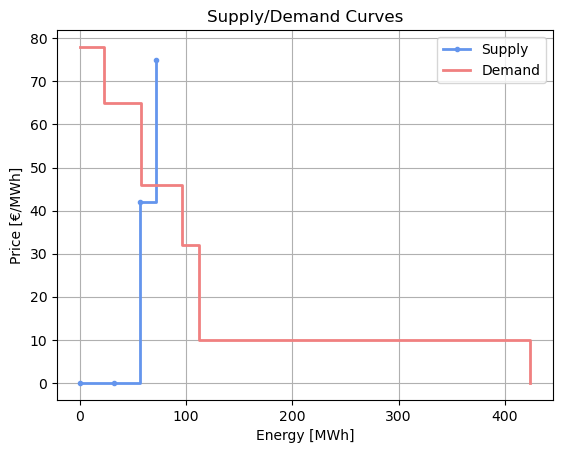

In [10]:
# Create the step plot
fig, ax = plt.subplots()
fig.figsize=(10, 6)

ax.step(x_supply, y_supply, where='post', label='Supply', color='cornflowerblue', linewidth=2, marker='.')
ax.step(x_demand, y_demand, where='post', label='Demand', color='lightcoral', linewidth=2)

# labels and title
ax.set_xlabel('Energy [MWh]')
ax.set_ylabel('Price [€/MWh]')
ax.set_title('Supply/Demand Curves')
ax.grid(True)
ax.legend(loc='upper right')

# Show the plot
plt.show()